In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf
from pandas_datareader import data

In [2]:
start = "2019-11-01"
end = "2020-11-01"

df = data.DataReader("^N225", "yahoo", start, end)
date = df.index

In [3]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-11-01,22852.720703,22705.599609,22730.490234,22850.769531,65400000,22850.769531
2019-11-05,23328.519531,23090.939453,23118.789062,23251.990234,102100000,23251.990234
2019-11-06,23352.560547,23246.570312,23343.509766,23303.820312,77400000,23303.820312
2019-11-07,23336.000000,23253.320312,23283.140625,23330.320312,70900000,23330.320312
2019-11-08,23591.089844,23313.410156,23550.039062,23391.869141,94600000,23391.869141


In [4]:
#基準線用のデータを作成
#過去26日間の最高、最低の値の平均
high = df["High"]
low = df["Low"]

max26 = high.rolling(window = 26).max()
min26 = low.rolling(window = 26).min()

df["basic_line"] = (max26 + min26) / 2

In [5]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close,basic_line
Date,,,,,,,
2020-10-26,23572.599609,23475.519531,23520.779297,23494.339844,41700000,23494.339844,23338.495117
2020-10-27,23485.800781,23232.310547,23376.960938,23485.800781,52700000,23485.800781,23338.495117
2020-10-28,23451.029297,23334.230469,23372.609375,23418.509766,67100000,23418.509766,23338.495117
2020-10-29,23374.099609,23170.759766,23170.759766,23331.939453,57500000,23331.939453,23338.495117
2020-10-30,23320.710938,22948.470703,23320.710938,22977.130859,76700000,22977.130859,23337.025391


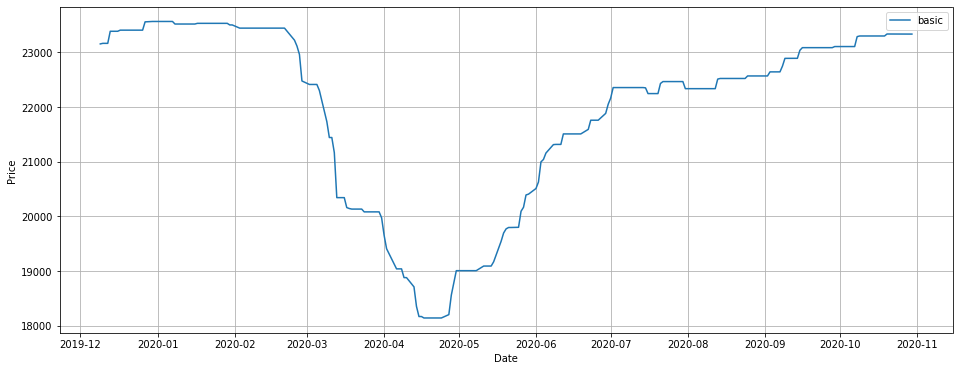

In [6]:
plt.figure(figsize = (16, 6))
plt.plot(date, df.basic_line, label = "basic")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid()

In [7]:
#転換線用のデータを作成
#過去9日間の最高、最低の値の平均
high9 = high.rolling(window = 9).max()
low9 = low.rolling(window = 9).min()

df["turn_line"] = (high9 + low9) / 2

In [8]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close,basic_line,turn_line
Date,,,,,,,,
2020-10-26,23572.599609,23475.519531,23520.779297,23494.339844,41700000,23494.339844,23338.495117,23544.915039
2020-10-27,23485.800781,23232.310547,23376.960938,23485.800781,52700000,23485.800781,23338.495117,23469.735352
2020-10-28,23451.029297,23334.230469,23372.609375,23418.509766,67100000,23418.509766,23338.495117,23469.735352
2020-10-29,23374.099609,23170.759766,23170.759766,23331.939453,57500000,23331.939453,23338.495117,23438.959961
2020-10-30,23320.710938,22948.470703,23320.710938,22977.130859,76700000,22977.130859,23337.025391,23325.385742


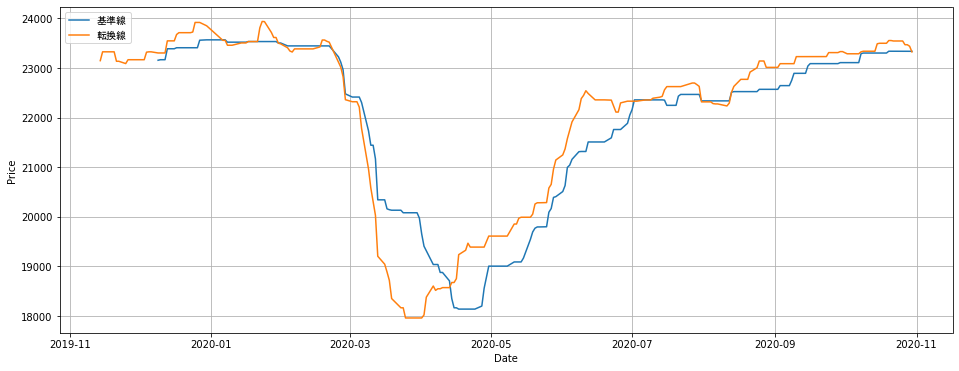

In [9]:
plt.figure(figsize = (16, 6))
plt.plot(date, df.basic_line, label = "基準線")
plt.plot(date, df.turn_line, label = "転換線")
plt.rcParams['font.family'] = "MS Gothic"
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid()

In [10]:
#先行スパンのデータを作成
df["span1"] = (df.basic_line + df.turn_line) / 2

high52 = high.rolling(window = 52).max()
low52 = low.rolling(window = 52).min()
df["span2"] = (high52 + low52) / 2

In [11]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close,basic_line,turn_line,span1,span2
Date,,,,,,,,,,
2020-10-26,23572.599609,23475.519531,23520.779297,23494.339844,41700000,23494.339844,23338.495117,23544.915039,23441.705078,23111.325195
2020-10-27,23485.800781,23232.310547,23376.960938,23485.800781,52700000,23485.800781,23338.495117,23469.735352,23404.115234,23160.184570
2020-10-28,23451.029297,23334.230469,23372.609375,23418.509766,67100000,23418.509766,23338.495117,23469.735352,23404.115234,23160.184570
2020-10-29,23374.099609,23170.759766,23170.759766,23331.939453,57500000,23331.939453,23338.495117,23438.959961,23388.727539,23160.184570
2020-10-30,23320.710938,22948.470703,23320.710938,22977.130859,76700000,22977.130859,23337.025391,23325.385742,23331.205566,23160.184570


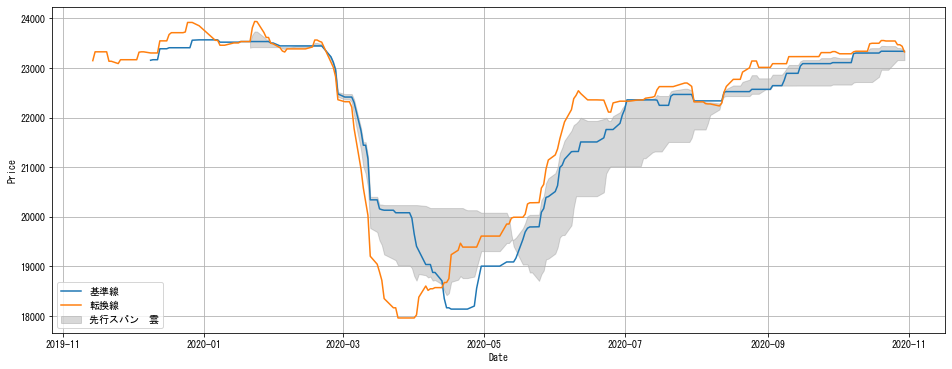

In [12]:
#雲のグラフを追加
plt.figure(figsize = (16, 6))
plt.plot(date, df.basic_line, label = "基準線")
plt.plot(date, df.turn_line, label = "転換線")
plt.fill_between(date, df["span1"], df["span2"], color = "gray", alpha = 0.3, label = "先行スパン　雲")
plt.rcParams['font.family'] = "MS Gothic"
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid()

In [13]:
#遅行線のデータを作成
df["slow_line"] = df["Adj Close"].shift(-25)

In [14]:
df.head()

,High,Low,Open,Close,Volume,Adj Close,basic_line,turn_line,span1,span2,slow_line
Date,,,,,,,,,,,
2019-11-01,22852.720703,22705.599609,22730.490234,22850.769531,65400000,22850.769531,NaN,NaN,NaN,NaN,23430.699219
2019-11-05,23328.519531,23090.939453,23118.789062,23251.990234,102100000,23251.990234,NaN,NaN,NaN,NaN,23410.189453
2019-11-06,23352.560547,23246.570312,23343.509766,23303.820312,77400000,23303.820312,NaN,NaN,NaN,NaN,23391.859375
2019-11-07,23336.000000,23253.320312,23283.140625,23330.320312,70900000,23330.320312,NaN,NaN,NaN,NaN,23424.810547
2019-11-08,23591.089844,23313.410156,23550.039062,23391.869141,94600000,23391.869141,NaN,NaN,NaN,NaN,24023.099609


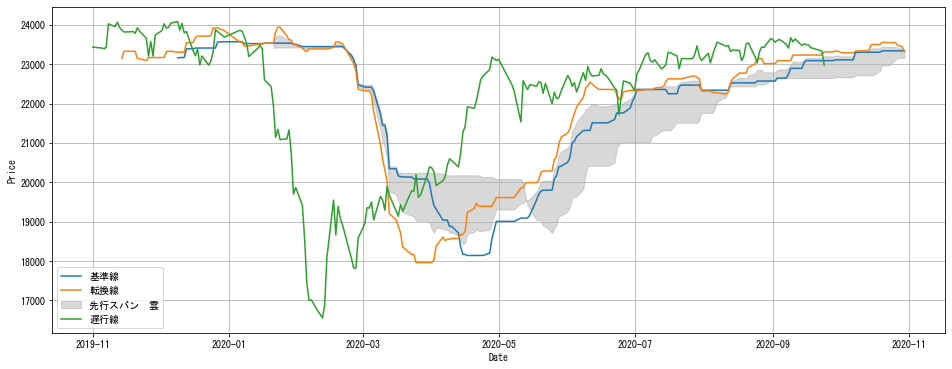

In [15]:
#雲のグラフを追加
plt.figure(figsize = (16, 6))
plt.plot(date, df.basic_line, label = "基準線")
plt.plot(date, df.turn_line, label = "転換線")
plt.fill_between(date, df["span1"], df["span2"], color = "gray", alpha = 0.3, label = "先行スパン　雲")
plt.plot(date, df.slow_line, label = "遅行線")
plt.rcParams['font.family'] = "MS Gothic"
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid()

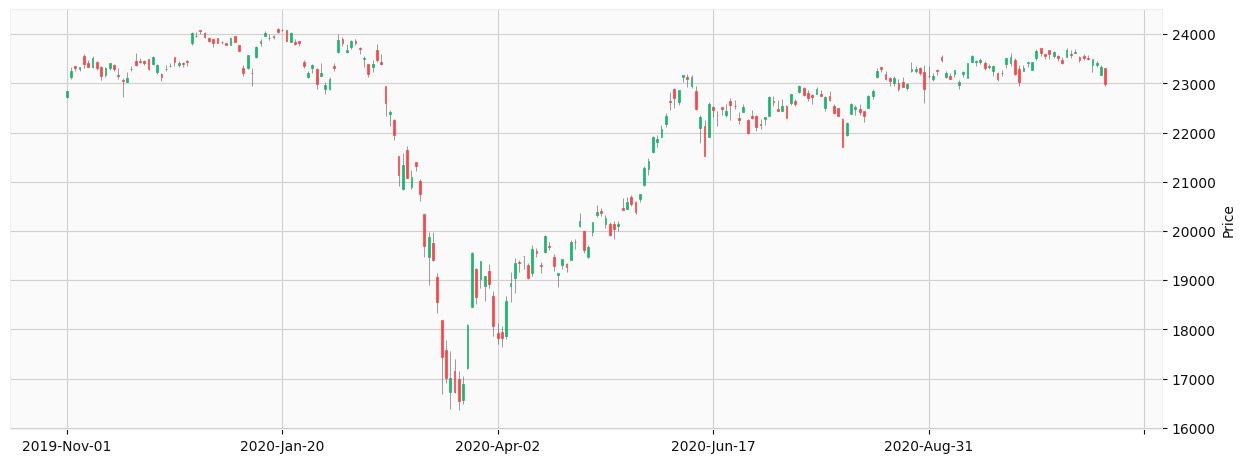

In [16]:
mpf.plot(df, type = "candle", figsize = (16,6), style = "yahoo", xrotation = 0)

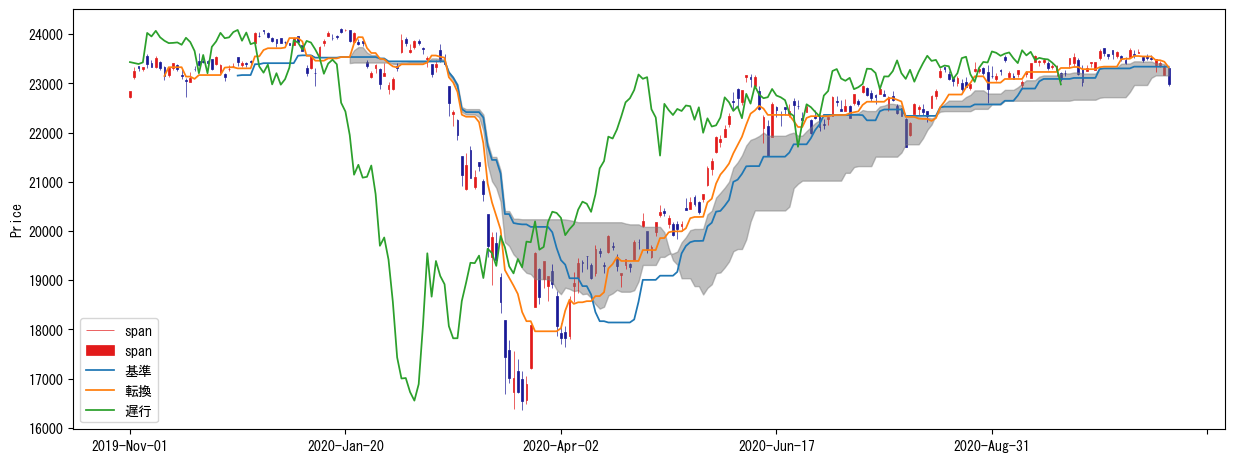

In [39]:
#ローソク足と一目均衡表の線をplotする
lines = [mpf.make_addplot(df['basic_line']), #基準線
        mpf.make_addplot(df['turn_line']),   #転換線
        mpf.make_addplot(df['slow_line']),#遅行線
       ]
labels = ["span", "span", "基準", "転換", "遅行"]
mc = mpf.make_marketcolors(up="#DF0101", down="#00008b", volume="#6E6E6E", edge="inherit", wick="inherit")
cs  = mpf.make_mpf_style(rc={"font.family":'MS Gothic'}, marketcolors=mc)

fig, ax = mpf.plot(df, type='candle', figsize=(16,6), style = cs, xrotation=0, addplot=lines, returnfig=True,
                  fill_between=dict(y1=df['span1'].values, y2=df['span2'].values, alpha=0.5, color='gray')) 
ax[0].legend(labels)
plt.show()